### Import dependencies

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
import datetime as dt
from dateutil import parser
%matplotlib inline

### Set matplotlib style

In [2]:
style.use('fivethirtyeight')

### Read csv files into a dataframe

In [3]:
csvpath1 = os.path.join("Stock Prices","xom.csv")
df = pd.read_csv(csvpath1)

### Convert dates to datetime

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

### Create new dataframe with a narrower date range to examine stock market crash of 2008

In [5]:
xom = df[(df['Date'] > '2008-03-16') & (df['Date'] < '2009-05-01')]

### Assign variables and create a function which calculates moving averages

In [6]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

### Assign column values to lists

In [7]:
date = xom['Date'].tolist()
closep = xom['Close'].tolist()
highp = xom['High'].tolist()
lowp = xom['Low'].tolist()
openp = xom['Open'].tolist()
volume = xom['Volume'].tolist()

### Create containers to hold appended data to calculate moving averages

In [8]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    start = len(date[MA2-1:])

### Set short dates

In [9]:
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

### Plot 10 and 30 day moving averages along with the stock price

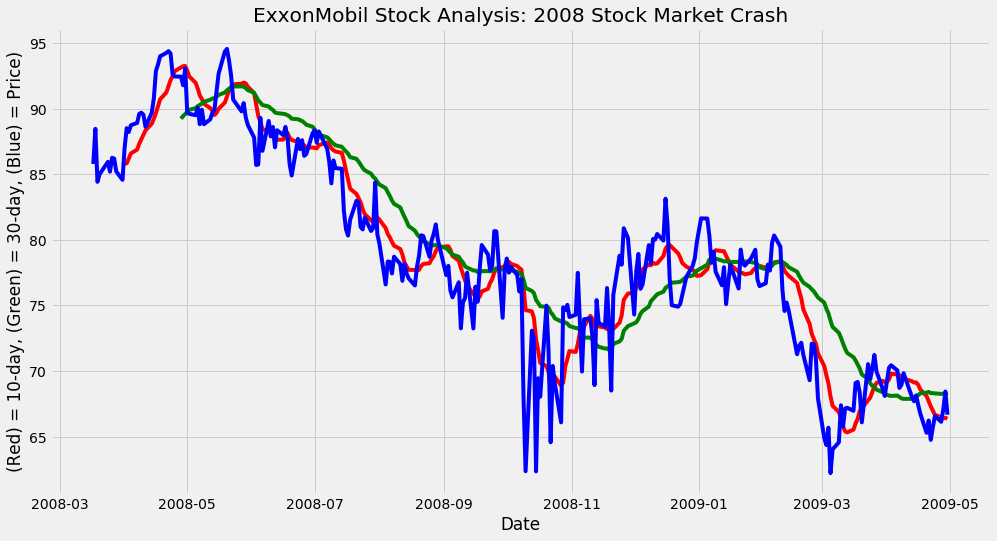

In [10]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("ExxonMobil Stock Analysis: 2008 Stock Market Crash")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")
plt.savefig("XOM.png")